# Chapter 3: 
# Đánh giá chất lượng của mô hình phân loại

Trong chương 2 chúng ta đã tìm hiểu cách thức tinh chỉnh tham số cho mô hình phân loại dựa vào tiêu chí là Accuracy. Trong thực tế thì Accuracy không phải là tiêu chuẩn thường được sử dụng để đánh giá chất lượng và tìm kiếm tham số tối ưu cho các mô hình ML. 

Nội dung của chương 3 sẽ hướng vào các mục tiêu sau: 

1. Các tiêu chí phổ biến khi đánh giá chất lượng của mô hình phân loại và biến được phân loại chỉ có hai nhãn (biến nhị phân). 
2. Sự đánh đổi giữa một số tiêu chuẩn đánh giá mô hình phân loại.  
3. Lựa chọn tiêu chuẩn đánh giá phù hợp cho tình huống dữ liệu là mất cân bằng (highly unbalanced data).  
4. Căn cứ để lựa chọn tiêu chí phù hợp cho tinh chỉnh, đánh giá và so sánh mô hình. 

Riêng với nhóm bài toán hồi quy (Regression Task) các tiêu chuẩn đánh giá chất lượng của mô hình sẽ được trình bày trong một chương riêng. 

# 3.1 Các tiêu chí đánh giá mô hình phân loại nhị phân

Nếu biến được dự báo chỉ có hai trạng thái bất kể chúng được kí hiệu như thế nào thì bài toán phân loại áp dụng cho bộ dữ liệu kiểu này trở thành bài toán phân loại nhị phân. Để minh họa chúng ta trở lại với bộ số liệu *GermanCredit.csv* đi kèm với textbook. Đây là bộ số liệu nổi tiếng và được sử dụng trong nhiều nghiên cứu về Data Science và Machine Learning do vậy những kết quả thực nghiệm thu được từ bộ dữ liệu này có thể so sánh và đối chiếu với các nghiên cứu mà sử dụng bộ số liệu này. 

Để minh họa (và cũng là để thay đổi) lần này mô hình ML được lựa chọn là Random Forest (RF). Trước hết chúng ta vẫn thực hiện các bước xử lí và chuẩn bị dữ liệu như đã biết: 

In [1]:
#======================================
#  Chuẩn bị dữ liệu cho huấn luyện RF
#======================================

import pandas as pd
df_bank = pd.read_csv("C:/Users/Zbook/Desktop/DataMining/dmba/GermanCredit.csv")
df_bank['RESPONSE'] = df_bank['RESPONSE'].map({1: 0, 0: 1})

# Bỏ biến không cần thiết: 
my_df_binary = df_bank.drop(["OBS#"], axis=1) 

# Tách ra features và target: 
Y = my_df_binary["RESPONSE"]
X = my_df_binary.drop("RESPONSE", 1)

# Phân chia dữ liệu theo tỉ lệ 80 - 20: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 29, stratify = Y)

Để không hiển thị những thông báo/cảnh báo chúng ta sử dụng nhóm lệnh sau: 

In [2]:
import warnings
warnings.filterwarnings("ignore")

Thực hiện huấn luyện RF và thực hiện dự báo RF với thư viện Scikit-Learn: 

In [3]:
# Load RandomForestClassifier: 
from sklearn.ensemble import RandomForestClassifier

# Huấn luyện và dự báo: 
my_rf = RandomForestClassifier(random_state=29)
my_rf.fit(X_train, y_train)
predicted = my_rf.predict(X_test)

Accuracy chung - tức mức độ chính xác khi dự báo cho cả nhãn 0 và 1: 

In [4]:
# Accuracy: 
my_rf.score(X_test, y_test)

0.735

Chúng ta tìm hiểu kĩ hơn chất lượng phân loại của mô hình RF bằng một tiêu chí gọi là *ma trận nhầm lẫn* (Confusion Matrix, viết tắt là CM). 
### 3.1.1 Ma trận nhầm lẫn 

Ma trận nhầm lẫn được minh họa đơn giản như sau với sự hỗ trợ của thư viện mglearn theo đó hàng của ma trận là quan sát thực tế còn cột của ma trận là quan sát được dự báo: 

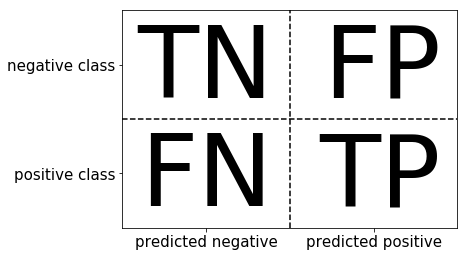

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import mglearn as mglearn
mglearn.plots.plot_binary_confusion_matrix()

Áp dụng trong tình huống cụ thể với các dự báo thực hiện từ mô hình RF thì: 

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
print(cm)

[[128  12]
 [ 41  19]]


Để đọc hiểu ý nghĩa của CM chúng ta kiểm tra lại số lượng thực tế của các nhãn 0 và 1. Cụ thể là có 140 nhãn 0 (hồ sơ tốt) và 60 nhãn 1 (hồ sơ xấu): 

In [6]:
y_test.value_counts() 

0    140
1     60
Name: RESPONSE, dtype: int64

Do vậy kết quả thu được từ CM được diễn giải như sau: 
- RF dự báo đúng 19 hồ sơ xấu trong tổng số 60 hồ sơ xấu, nói cách khác True Positive (TP) = 60. 
- RF dự báo đúng 128 hồ sơ tốt trong tổng số 140 hồ sơ tốt, nói cách khác True Negative (TN) = 128. 
- Có 141 cases RF dự báo thành nhãn 1 (hồ sơ xấu) trong khi chúng thực tế là hồ sơ tốt (nhãn 0) và do đó False Positive (FP) = 141. 
- Có 41 case RF dự báo thành nhãn 0 (hồ sơ tốt) trong khi thực tế chúng là hồ sơ xấu (nhãn 1) và do đó False Negative (FN) = 41. Sai sót này được gọi là *âm tính giả*. 
- Có 12 case RF dự báo thành nhãn 1 (hồ sơ xấu) trong khi thực tế chúng ta hồ sơ tốt (nhãn 0) và do vậy False Positive (FP) = 12, Sai sót này gọi là *dương tính giả*. 
- Accurcy chính mà chúng ta đã biết chính là bằng (128 + 19) / 200. Chỉ tiêu này đo lường mức chính xác chung khi phân loại cho cả nhãn 0 lẫn nhãn 1. 
    
Accuracy chỉ nên là một tiêu chí thô để đánh giá sơ bộ chất lượng phân loại của mô hình và do vậy chúng ta cần xét đến những tiêu chí khác như dưới đây.     

### 3.1.2 Recall

Tiêu chí này trả lời câu hỏi sau **Mô hình RF dự báo đúng tỉ lệ hồ sơ xấu là bao nhiêu so với tổng số hồ sơ xấu thực tế?**. Recall còn có tên gọi khác là Sensitivity hoặc True Positive Rate (TPR). Với kết quả đã có chúng ta có thể tính Recall theo hai cách dưới đây: 

In [7]:
# Cách 1: 
from sklearn.metrics import recall_score
recall_score(y_test, predicted)

0.31666666666666665

In [8]:
# Cách 2: 
import numpy as np
cm[1, 1] / np.sum(cm[1]) # Bằng 19 / (19 + 41)

0.31666666666666665

Nếu chúng ta phát triển một mô hình dự báo bệnh nhân nào bị nhiễm hay không bị nhiễm HIV dựa trên kết quả xét nghiệm sinh hóa của họ thì chỉ dự báo đúng 23 (làm tròn thành 23%) trong khi tổng số người nhiễm HIV thực sự là 100 người thì đây thực sự là một mô hình tai họa. Do vậy, trong tình huống là phát triển mô hình dự báo nhiễm HIV thì mục tiêu hàng đầu của mô hình sẽ phải là Recall cao nhất có thể được. 

### 3.1.3 Precision

Precision là thước đo được thiết kế để trả lời câu hỏi sau **Tỉ lệ giữa hồ sơ xấu được dự báo đúng là xấu so với tổng số hồ sơ xấu được dự báo của mô hình là bao nhiêu?**. Tiêu chí này còn có tên là Positive Predictive Value (PPV). Chúng ta có thể tính toán con số này theo hai cách như sau: 

In [9]:
# Cách 1: 
from sklearn.metrics import precision_score
precision_score(y_test, predicted)

0.6129032258064516

In [10]:
# Cách 2: 
cm[1, 1] / np.sum(cm[0, 1] + cm[1, 1]) # Bằng 19 / (19 + 12)

0.6129032258064516

Các mô hình ML thực tế là đưa ra *xác suất dự báo cho sự kiện mà ta quan tâm*. Chẳng hạn sự kiện quan tâm là **hồ sơ không được cấp tín dụng** (kí hiệu nhãn là 1). Nếu có hai cases mà mô hình đưa ra dự báo xác suất cho sự kiện này lần lượt là 0.47 và 0.53 thì rõ ràng việc gán nhãn cho hai cases này là 0 hay 1 hoàn toàn phụ thuộc vào ngưỡng lựa chọn. Nếu ngưỡng này là 0.50 thì một case sẽ được gán nhãn 0 (tương ứng với xác suất dự báo 0.47) và một case sẽ được gán nhãn 1 (ứng với xác suất dự báo 0.53). Nhưng nếu chúng ta hạ thấp ngưỡng này xuống 0.45 thì cả hai cases sẽ được gán nhãn là 1. Mặc định thì hàm *predict(X_test)* sẽ sử dụng ngưỡng 0.5 để dán nhãn. Cả Recall lẫn Precision đều phụ thuộc vào ngưỡng mà chúng ta lựa chọn để phân loại và luôn có sự đánh đổi giữa hai tiêu chí này. Nghĩa là, bằng cách thay đổi ngưỡng theo hướng làm tăng Recall thì Precision buộc *phải giảm*. Điều này sẽ được giải thích ở mục 3.3.4 bằng công cụ hình ảnh. 

### 3.1.4 Sự đánh đổi giữa Recall và Precision

Từ cách tính toán cho Recall và Precision cho thấy: (1) Recall đo lường tỉ lệ xác minh đúng hồ sơ xấu so với thực tế, (2) Precision đo lường tỉ lệ xác minh đúng hồ sơ xấu so với những hồ sơ được dán nhãn là xấu do mô hình đưa ra. Điều này dẫn đến hệ quả là: chúng ta thường bị lôi kéo vào một chiến lược sao cho cả Recall lẫn Precision là cao nhất có thể được. Rất tiếc chiến lược này không thực hiện được vì luôn có sự đánh đổi giữa Recall và Precision (vấn đề được gọi là Precision-Recall Tradeoff). Điều này có thể được thấy rõ khi chúng biểu diễn cả hai tiêu chí này trên hệ trục tọa độ hai chiều: 

Text(0.5, 1.0, 'Figure 1: Tradeoff Between Recall and Precision')

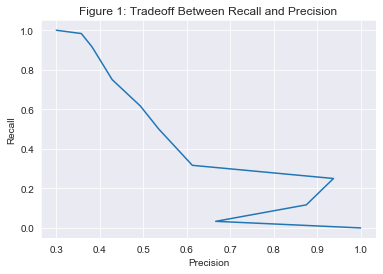

In [13]:
# Load precision_recall_curve: 
from sklearn.metrics import precision_recall_curve
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, my_rf.predict_proba(X_test)[:, 1])

# Minh họa sự đánh đổi giữa Recall và Precision cho mô hình RF: 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

plt.plot(precision_rf, recall_rf)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Figure 1: Tradeoff Between Recall and Precision")

### 3.1.5 ROC và AUC

ROC (viết tắt của receiver operating characteristics curve) và diện tích nằm dưới đường cong này - kí hiệu là AUC là một tiêu chuẩn được sử dụng phổ biến nhất khi đánh giá và so sánh chất lượng phân loại của các mô hình ML vì tiêu chí này phản ánh khả năng phân biệt - phân loại cho cả hai nhãn 0 và 1. Nếu mô hình là hoàn hảo thì AUC = 1 và ROC trùng với hai cạnh hình vuông (nửa trên và bên trái). Còn nếu AUC = 0.5 thì chất lượng phân loại - dự báo của mô hình chỉ tương đương với đoán ngẫu nhiên. Trong hầu hết các áp dụng thực tế thì mô hình có AUC từ 0.6 trở được coi là có thể sử dụng được. 

ROC là đường cong được tạo cho cặp tiêu chí Recall và FPR (viết tắt của False Positive Rate), trong đó FPR = FP / (FP + TN). Chúng ta có thể minh họa ROC và phần diện tích nằm dưới đường cong này như sau: 

Text(0.5, 1.0, 'Figure 2: ROC Curve for Random Forest')

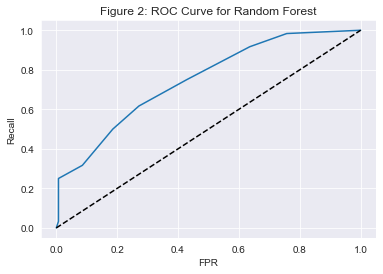

In [14]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, my_rf.predict_proba(X_test)[:, 1])

# Vẽ đường ROC: 
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("FPR")
plt.ylabel("Recall")
plt.title("Figure 2: ROC Curve for Random Forest")

Giá trị AUC cho RF là khoảng 0.74: 

In [15]:
# Tính giá trị AUC: 
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, my_rf.predict_proba(X_test)[:, 1])
print(rf_auc)

0.7472619047619047


Nếu AUC của mô hình bằng 0.5 thì chúng ta nói khả năng dự báo của mô hình chỉ tương đương với đoán ngẫu nhiên. Một mô hình hoàn hảo sẽ có AUC = 1. Trong các ứng dụng thông thường của mô hình phân loại nếu mô hình có AUC > 0.60 thì được cho là có thể sử dụng được. Chúng ta sẽ thảo luận về tiêu chí AUC này kĩ hơn trong các phần sau. 

### 3.1.6 Một số tiêu chí khác đánh giá chất lượng của các mô hình phân loại

Recall, Precision ROC/AUC là ba tiêu chí được sử dụng tương đối phổ biến (ít nhất là về phương diện lí thuyết) để đánh giá chất lượng của mô hình phân loại. Ngoài các tiêu chí trên còn khoảng không ít hơn 9 tiêu chí khác và hầu hết chúng đều được tính toán dựa trên ma trận nhầm lẫn CM và chúng có mối liên hệ chặt chẽ với nhau. Các bạn có thể tham khảo thêm về các tiêu chí này [ở đây](https://en.wikipedia.org/wiki/Sensitivity_and_specificity). 

Cần lưu ý rằng trong thực tế có thể một số hoặc tất cả các tiêu chí này là không phù hợp trong một số ứng dụng thực tế. Chúng ta sẽ nghiên cứu chi tiết vấn đề ở mục 3.3. 

# 3.2 Tinh chỉnh tham số theo tiêu chuẩn AUC

Chương 2 trình bày các phương pháp tinh chỉnh mô hình dựa trên tiêu chuẩn Accuracy. Nhưng Accuracy - tiêu chuẩn thô đo lường và đánh giá sơ bộ mức độ chính xác chung khi phân loại của mô hình. Trong thực tế Accuracy thường không phải là tiêu chuẩn được lựa chọn cho tinh chỉnh cũng như so sánh các mô hình với nhau. Mục này sẽ trình bày phương pháp tinh chỉnh mô hình theo tiêu chuẩn AUC bằng cả hàm *GridSearchCV* và *cross_val_score*. Để minh họa, mô hình SVM đựa lựa chọn và giả sử rằng chúng ta chỉ tinh chỉnh cho tham số gamma mà thôi. 

Dưới đây là Python Codes tinh chỉnh tham số gamma cho SVM bằng cross_val_score và GridSearchCV: 

In [26]:
#======================================================================
#  Tinh chỉnh tham số cho SVM bằng cross_val_score theo tiêu chuẩn AUC
#======================================================================

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

best_score_auc = 0

# Vòng lặp for loop tinh chỉnh tham số theo cách tiếp cận Grid Search + cross-validation: 
for gamma in [0.00025, 0.0005, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:      
    
        my_svm = SVC(gamma=gamma)
        score_5Fold_auc = cross_val_score(my_svm, X_train, y_train, cv = 5, scoring = "roc_auc")
        
        # Tính mean cho 5 giá trị Accuracy: 
        mean_auc = np.mean(score_5Fold_auc)
        
        if mean_auc > best_score_auc:
            best_score_auc = mean_auc
            best_parameters5Fold = {"gamma": gamma}

In [27]:
# AUC trung bình cao nhất và giá trị tương ứng của tham số gamma: 
print("Tham số tốt nhất dựa trên AUC: ", best_parameters5Fold)
print("Giá trị AUC cao nhất: ", best_score_auc)

Tham số tốt nhất dựa trên AUC:  {'gamma': 0.0005}
Giá trị AUC cao nhất:  0.5805059523809524


In [28]:
# Huấn luyện lại SVM với tham số tối ưu và đánh giá lại chất lượng phân loại của mô hình theo AUC: 
best_svm1 = SVC(**best_parameters5Fold).fit(X_train, y_train)
roc_auc_score(y_test, best_svm1.decision_function(X_test))

0.5153571428571428

Các kết quả chỉ ra rằng SVM có chất lượng dự báo không tốt. Nguyên nhân là SVM rất nhạy cảm với "thước đo" của features. Chúng ta có thể nâng cao chất lượng dự báo của các mô hình ML nói chung và SVM nói riêng bằng các kĩ thuật Feature Engineering (FE) được trình bày ở chương 4. 

In [29]:
#======================================================================
#  Tinh chỉnh tham số cho SVM bằng GridSearchCV theo tiêu chuẩn AUC
#======================================================================

param_grid = {"gamma": [0.00025, 0.0005, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring = "roc_auc") 
grid_search.fit(X_train, y_train)

# Tham số tối ưu: 
print("Tham số tốt nhất:", grid_search.best_params_)

Tham số tốt nhất: {'gamma': 0.0005}


In [30]:
# Huấn luyện lại SVM với tham số tối ưu và tính AUC trên test data: 
best_svm2 = SVC(**grid_search.best_params_).fit(X_train, y_train)
roc_auc_score(y_test, best_svm2.decision_function(X_test))

0.5153571428571428

Kết quả AUC cho SVM khi gamma = 0.00025 sẽ phải là như nhau bất kể là sử dụng hàm *cross_val_score()* hay *GridSearchCV()*. Lưu ý rằng ngoài AUC (và Accuracy) đã biết thì các mô hình ML còn được tinh chỉnh tham số dựa trên nhiều tiêu chí khác (và thường rất đa đạng). Ví dụ, với các tổ chức kinh doanh vì lợi nhuận thì tiêu chí đó có thể là lợi nhuận. Hoặc cũng chính ngân hàng đó nếu chiến lược kinh doanh của nó là thận trọng và ngại rủi ro thì tiêu chí được chọn sẽ là Recall. 

Đặc biệt trong tình huống gọi là dữ liệu mất cân bằng thì các tiêu chí như Accuracy, ROC/AUC đều không thể sử dụng được. Trong tình huống cực đoan này thì cái gọi là "tiêu chuẩn đánh giá mô hình" là linh hoạt và phụ thuộc vào bối cảnh - mục tiêu của tổ chức sử dụng mô hình phân loại như được trình bày ở mục 3.3 dưới đây. 

# 3.3 Dữ liệu mất cân bằng và tiêu chuẩn đánh giá phù hợp 

Dữ liệu mất cân bằng (highly unbalanced data hoặc ngắn gọn là unbalanced data) là loại dữ liệu mà biến được phân loại có một nhãn chiếm đa số áp đảo so với nhãn còn lại. Kiểu dữ liệu này rất phổ biến trong thực tế. Ví dụ một loại bệnh hiếm gặp nào đó có thể chỉ có 1 người cứ mỗi 10.000 dân hoặc tỉ lệ phá sản (Default) của khách hàng thuộc nhóm cho vay tín dụng nào đó của ngân hàng là đặc biệt thấp: dưới 3%. Trong tình huống mà các lớp của biến được phân loại bất đối xứng ở mức cực đoan như vậy thì các tiêu chí thông thường đánh giá chất lượng mô hình phân loại là không thể sử dụng được. 

Rất tiếc là với bộ dữ liệu mất cân bằng, các thuật toán hiện có của Machine Learning lẫn cách tiếp cận theo phương pháp thống kê truyền thống vẫn chưa có cách xử lí hiệu quả. 

Để minh họa chúng ta xét bộ dữ liệu *creditcard.csv* được sử dụng trong cuộc thi về mô hình phân loại trên Kaggle -  diễn đàn dành cho người làm khoa học dữ liệu. Nguồn gốc, mô tả và download bộ dữ liệu này [ở đây](https://www.kaggle.com/mlg-ulb/creditcardfraud). Sau khi download, giải nén chúng ta đọc bộ dữ liệu này: 

In [31]:
df = pd.read_csv("C:/Users/Zbook/Desktop/learPython/creditcard.csv")

In [22]:
# Số lượng nhãn 0 và 1 (1 ứng với giao dịch tài chính là gian lận, ngược lại là 0): 
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Chúng ta thấy rằng chỉ có 492 quan sát có nhãn là 1 trong hơn 280,000 quan sát. Đây là một bộ dữ liệu mà nhóm 0 - nhãn chiếm đa số có tỉ lệ gần như là 100%: 

In [23]:
df["Class"].value_counts() / len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Giả sử chúng ta sử dụng Logistic Regression để phân loại nhãn 0 - 1 (tức là dự báo xem case nào sẽ là giao dịch tài chính gian lận) trước hết chúng ta loại bỏ biến không cần thiết đồng thời phân chia dữ liệu theo tỉ lệ 70 - 30 cho train và test data: 

In [24]:
# Chuẩn bị dữ liệu: 
my_df_binary = df.drop(["Time"], axis=1)
Y = my_df_binary["Class"]
X = my_df_binary.drop("Class", 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 29, stratify = Y)

Huấn luyện Logistic Regression và tính Accuracy trên test data: 

In [25]:
# Huấn luyện Logistic Regression và thực hiện dự báo: 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
pred = logmodel.predict(X_test)

In [26]:
# Tính Accuracy: 
logmodel.score(X_test, y_test)

0.9991661034207315

Kết quả là Accuracy = 0.999166 - một con số rất cao. Đến đây chúng ta có thể lạc quan vì mô hình này dự báo đúng gần nha 100%. Tuy nhiên nếu xem xét đến tỉ lệ của các nhãn thuộc biến được phân loại y_train thì có thể chúng ta phải nghĩ khác: 

In [27]:
y_test.value_counts() / len(y_test)

0    0.998271
1    0.001729
Name: Class, dtype: float64

Vì không cần đến mô hình gì, bằng cách gán cho tất cả là nhãn 0 thì "mô hình không gì hết" của chúng ta cũng có tỉ lệ chính xác là 0.998271. Mô hình Logistic có mức độ chính xác cao hơn "mô hình không gì hết" chỉ 0.089% - một con số cũng gần như là 0: 

In [28]:
100*(0.999166 / 0.998271) - 100

0.08965501351836735

Ví dụ này cho thấy với tình huống dữ liệu mất cân bằng thì Accuracy là một thước đo không thể sử dụng được. ROC/AUC cũng rất cao: 

In [29]:
roc_auc_score(y_test, logmodel.decision_function(X_test))

0.9639073287823052

Ngay cả trong tình huống này thì ROC/AUC cũng chưa phải là tiêu chí tốt để đánh giá mô hình vì trong tổng số 79 + 118 = 197 cases gian lận mô hình xác định đúng 118 cases gian lận còn 79 cases thực sự gian lận thì dự đoán sai thành không gian lận như chúng ta có thể thấy:  

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[113710,     16],
       [    79,    118]], dtype=int64)

Nói cách khác, để xem mô hình tốt đến mức nào khi xác định đúng các cases thực sự gian lận chúng ta cần căn cứ vào Recall: 

In [31]:
# Tính Recall: 
recall_score(y_test, pred)

0.5989847715736041

Như vậy với bài toán là "Xác định các giao dịnh gian lận" thì Accuracy và có thể là ROC/AUC cũng không phải là tiêu chí hợp lí để đánh giá chất lượng phân loại của mô hình. Trong tình huống này chúng ta có lẽ nên hướng đến vài chiến lược kiểu như sau: 

- Đặt ra một mục tiêu là dự báo đúng từ 80% các cases gian lận (hay Recall >= 0.8). 
- Sự kiện quan tâm là *giao dịch gian lận*. Giả sử lấy ra 1000 cases có xác suất dự báo là giao dịch gian lận cao nhất thì mục tiêu của ngân hàng sẽ là: xây dựng một mô hình sao cho trong số 1000 cases khả nghi cao nhất này, có 800 là giao dịch gian lận. 

Dưới đây là Python Codes đưa ra cách tiếp cận để đạt được Recall lớn hơn 80%: 

In [32]:
# Tính toán xác suất dự báo cho sự kiện "giao dịch là gian lận": 
pred_prob = logmodel.predict_proba(X_test)

Kế tiếp viết hàm tính toán Recall tương ứng với các ngưỡng xác suất (cutoff) chọn trước: 

In [33]:
def Recall_from_Cutoff(cutoff): 
    y_pred = (pred_prob[:, 1] >= cutoff).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    my_recall = cm[1, 1] / (np.sum(cm[1]))
    return(my_recall)

Với hàm đã có chúng ta có thể kiểm tra lại rằng nếu cutoff = 0.5 (là ngưỡng mặc định) thì Recall phải bằng 0.598984 như đã biết: 

In [34]:
Recall_from_Cutoff(0.5)

0.5989847715736041

Dưới đây chúng ta minh họa sự biến đổi của Recall khi cutoff - tức là ngưỡng xác suất được chọn để dán nhãn là 1 thay đổi: 

In [35]:
# Thiết lập một dải giá trị của cutoff: 

cutoff = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]

# Tạo ra array trống lưu dữ liệu: 
recall = []

# Viết vòng lặp for loop tính toán Recall tương ứng với Cutoff được chọn: 
for i in cutoff:
    recall_i = Recall_from_Cutoff(cutoff=i)
    recall.append(recall_i)

Hình ảnh hóa sự biến đổi của Recall: 

Text(0.5,1,'Figure 3: Biến đổi của Recall khi Cutoff thay đổi')

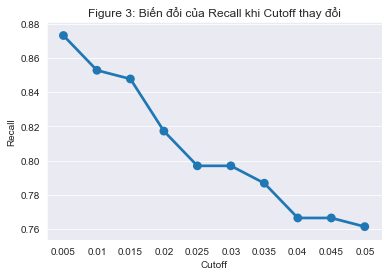

In [36]:
# Minh họa Accuracy khi K thay đổi: 
df_results = {"Cutoff": cutoff, "Recall": recall}
sns.pointplot(x="Cutoff", y="Recall", data = df_results)
plt.xlabel("Cutoff")
plt.ylabel("Recall")
plt.title("Figure 3: Biến đổi của Recall khi Cutoff thay đổi")

Từ Figure 3 chúng ta có thể thấy rằng nếu muốn xác định đúng nhiều hơn 80% các cases gian lận thì chúng ta sẽ phải đặt ngưỡng xác suất để phân loại thấp hơn 0.025. Chúng ta có thể kiểm tra CM với, ví dụ, ngưỡng là 0.022 chẳng hạn: 

In [37]:
# CM khi ngưỡng xác suất sử dụng cho phân loại là 0.022: 
y_pred = (pred_prob[:, 1] >= 0.022).astype(int)
confusion_matrix(y_test, y_pred)

array([[113637,     89],
       [    37,    160]], dtype=int64)

In [38]:
# Recall: 
recall_score(y_test, y_pred) # Bằng 160 / 197

0.8121827411167513

# 3.4 Căn cứ lựa chọn tiêu chí đánh giá

Đến đây chúng ta đã có một "mô hình" mà thỏa mãn mục tiêu là phân loại chính xác ít nhất 80% các giao dịch gian lận. Tuy nhiên, theo nguyên lí đánh đổi mà chúng ta đã biết thì Precision sẽ giảm vì chúng ta đã thay đổi ngưỡng xác suất để Recall tăng lên 81% từ 59.9%. Điều này có nghĩa là: **để đặt mục tiêu xác định đúng ít nhất 80% các cases gian lận thì cái giá chúng ta phải trả là chúng ta buộc xếp loại sai 89 khách hàng thực tế là không gian lận thành gian lận so với con số ban đầu là 16**. 

Kết luận trên dẫn đến việc chúng ta phải cân nhắc đến lợi ích và chi phí của việc sử dụng mô hình cũng như chọn tiêu chí đánh giá. Chẳng hạn, chúng ta có thể so sánh xem lợi ích thu được của việc xác minh đúng 160 cases gian lận (so với 118 ban đầu) có bù đắp được chi phí của việc, ví dụ, nguy cơ bị kiện cáo khi mô hình xác minh nhầm thêm 73 khách hàng trong sạch thành gian lận? Hoặc việc xác minh sai 73 khách hàng trong sạch này thành gian lận sẽ dẫn đến mức độ hài lòng (vốn lan truyền rất nhanh trên mạng xã hội) giảm dẫn đến khả năng từ bỏ sử dụng dịch vụ thẻ - tín dụng của khách hàng. Trong tình huống này, trước khi quyết định triển khai sử dụng mô hình chúng ta cần cân nhắc đến những "chi phí" tiềm ẩn này. 

Trong tình huống mà chúng ta phát triển mô hình để phân loại một loại bệnh rất hiếm gặp - nhưng rất nguy hại vì tốc độ lây nhiễm cao thì chúng ta có thể hướng đến chiến lược xây dựng mô hình sao cho Recall cao nhất bất chấp khả năng mô hình sẽ phân loại sai nhiều người vốn không bị nhiễm thành bị nhiễm - tức tăng số lượng cases là dương tính giả (False Positive - FP). 

Những phân tích ở trên một lần nữa chỉ ra rằng **tiêu chí nào sẽ được sử dụng để tinh chỉnh hay lựa chọn mô hình sẽ phải căn cứ trước hết vào bối cảnh của kinh doanh và mục tiêu của tổ chức hay mục tiêu của mô hình phân loại**. Điều này cũng hàm ý rằng một số hoặc tất cả các tiêu chí đánh giá được đề cập ở mục 3.1.6 có thể không được sử dụng nếu chúng không phù hợp với bối cảnh cần giải quyết hoặc mục tiêu phân loại của mô hình. 

# 3.5 Tóm tắt chương

Chương này trình bày: (1) các tiêu chí đánh giá mô hình phân loại phổ biến, (2) sự không phù hợp của các tiêu chí đánh giá mô hình trong tình huống cực đoan là dữ liệu không cần bằng, và (3) những căn cứ để lựa chọn tiêu chí phù hợp cho đánh giá, so sánh và tinh chỉnh mô hình. 

# Tài liệu tham khảo

1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning. New York: springer.
2. Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. New York: Springer.
3. Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. "O'Reilly Media, Inc.".
4. Géron, A. (2019). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
5. Shmueli, G., Bruce, P. C., Yahav, I., Patel, N. R., & Lichtendahl Jr, K. C. (2017). Data mining for business analytics: concepts, techniques, and applications in R. John Wiley & Sons. 
